In [8]:
#!/usr/bin/env python
from glob import glob
import mahotas
import mahotas.features
import milk

def features_for(imname):
    img = mahotas.imread(imname)
    return mahotas.features.haralick(img).mean(0)

def learn_model(features, labels):
    learner = milk.defaultclassifier()
    return learner.train(features, labels)

def classify(model, features):
     return model.apply(features)

In [9]:
from os import chdir
# Change to your directory where you installed the datafiles
chdir('/Users/markon/mqtt/set5')

In [10]:
positives = glob('positives/*')
negatives = glob('negatives/*')
unlabeledP = glob('unlabeledP/*')
unlabeledN = glob('unlabeledN/*')

features = [features_for(x) for x in negatives + positives]
labels = [0] * len(negatives) + [1] * len(positives)

In [11]:
model = learn_model(features, labels)

labeledP = [classify(model, features_for(u)) for u in unlabeledP]
labeledN = [classify(model, features_for(u)) for u in unlabeledN]
print labeledP
print labeledN

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
import matplotlib.pyplot as plt

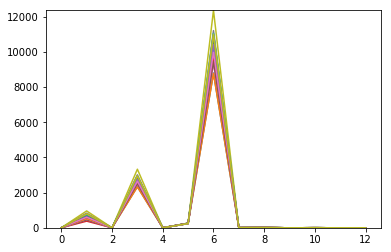

In [33]:
ymax = max(map(max,features))

axes = plt.gca()
axes.set_ylim([0,ymax])

for x in features[:len(negatives)]:
    plt.plot(x)
plt.show()

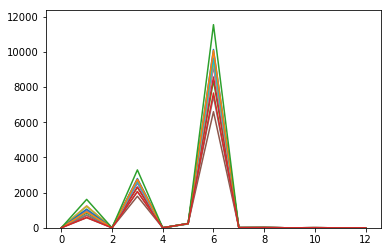

In [34]:
axes = plt.gca()
axes.set_ylim([0,ymax])

for x in features[len(negatives):]:
    plt.plot(x)
plt.show()

In [23]:
chdir('../set6')
positives = glob('positives/*')
negatives = glob('negatives/*')
unlabeledP = glob('unlabeledP/*')
unlabeledN = glob('unlabeledN/*')

features = map(features_for, negatives + positives)
labels = [0] * len(negatives) + [1] * len(positives)

model = learn_model(features, labels)

labeledP = [classify(model, features_for(u)) for u in unlabeledP]
labeledN = [classify(model, features_for(u)) for u in unlabeledN]
print labeledP
print labeledN

[1, 1, 1, 1]
[0, 0, 0, 0]


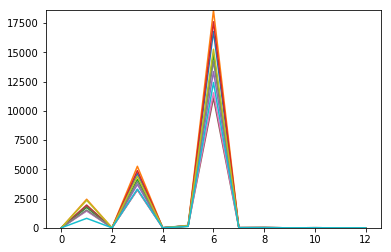

In [28]:
ymax = max(map(max,features))

axes = plt.gca()
axes.set_ylim([0,ymax])

for x in features[:len(negatives)]:
    plt.plot(x)
plt.show()

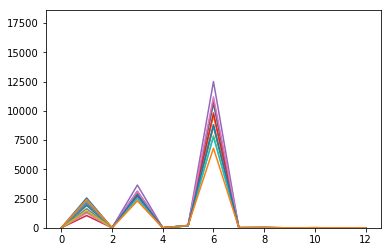

In [29]:
ymax = max(map(max,features))

axes = plt.gca()
axes.set_ylim([0,ymax])

for x in features[len(negatives):]:
    plt.plot(x)
plt.show()